# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [21]:
dataset_train = pd.read_csv('jena_climate_2009_train_set_csv.csv')
training_set = dataset_train.iloc[:, 3:4].values
print(training_set)

[[265.4 ]
 [265.01]
 [264.91]
 ...
 [255.84]
 [255.8 ]
 [255.84]]


### Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.64488017]
 [0.62788671]
 [0.62352941]
 ...
 [0.22832244]
 [0.22657952]
 [0.22832244]]


### Creating a data structure with 60 timesteps and 1 output

In [23]:
X_train = []
y_train = []
for i in range(60, 1199):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print(y_train)

[[0.64488017 0.62788671 0.62352941 ... 0.67145969 0.67668845 0.67538126]
 [0.62788671 0.62352941 0.63267974 ... 0.67668845 0.67538126 0.67538126]
 [0.62352941 0.63267974 0.63398693 ... 0.67538126 0.67538126 0.66971678]
 ...
 [0.46579521 0.46361656 0.46187364 ... 0.2627451  0.25925926 0.23572985]
 [0.46361656 0.46187364 0.4422658  ... 0.25925926 0.23572985 0.22832244]
 [0.46187364 0.4422658  0.42527233 ... 0.23572985 0.22832244 0.22657952]]
[0.67538126 0.66971678 0.66448802 ... 0.22832244 0.22657952 0.22832244]


### Reshaping

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.64488017]
  [0.62788671]
  [0.62352941]
  ...
  [0.67145969]
  [0.67668845]
  [0.67538126]]

 [[0.62788671]
  [0.62352941]
  [0.63267974]
  ...
  [0.67668845]
  [0.67538126]
  [0.67538126]]

 [[0.62352941]
  [0.63267974]
  [0.63398693]
  ...
  [0.67538126]
  [0.67538126]
  [0.66971678]]

 ...

 [[0.46579521]
  [0.46361656]
  [0.46187364]
  ...
  [0.2627451 ]
  [0.25925926]
  [0.23572985]]

 [[0.46361656]
  [0.46187364]
  [0.4422658 ]
  ...
  [0.25925926]
  [0.23572985]
  [0.22832244]]

 [[0.46187364]
  [0.4422658 ]
  [0.42527233]
  ...
  [0.23572985]
  [0.22832244]
  [0.22657952]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [26]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [28]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [29]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [30]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [31]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [32]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [33]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 10s 107ms/step - loss: 0.1211
Epoch 2/100
36/36 [==============================] - 4s 107ms/step - loss: 0.0139
Epoch 3/100
36/36 [==============================] - 4s 108ms/step - loss: 0.0090
Epoch 4/100
36/36 [==============================] - 4s 108ms/step - loss: 0.0082
Epoch 5/100
36/36 [==============================] - 4s 108ms/step - loss: 0.0081
Epoch 6/100
36/36 [==============================] - 4s 110ms/step - loss: 0.0067
Epoch 7/100
36/36 [==============================] - 4s 108ms/step - loss: 0.0062
Epoch 8/100
36/36 [==============================] - 4s 111ms/step - loss: 0.0072
Epoch 9/100
36/36 [==============================] - 4s 109ms/step - loss: 0.0058
Epoch 10/100
36/36 [==============================] - 4s 110ms/step - loss: 0.0064
Epoch 11/100
36/36 [==============================] - 4s 110ms/step - loss: 0.0067
Epoch 12/100
36/36 [==============================] - 4s 110ms/step - loss: 0.0052
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [38]:
dataset_test = pd.read_csv('jena_climate_2009_test_set_csv.csv')
real_temperature_values = dataset_test.iloc[:, 3:4].values
print(real_temperature_values)

[[255.9 ]
 [256.13]
 [255.96]
 [256.14]
 [256.83]
 [256.74]
 [256.62]
 [256.38]
 [256.42]
 [256.59]
 [257.17]
 [257.65]
 [257.97]
 [259.07]
 [259.76]
 [259.98]
 [259.65]
 [259.98]
 [260.66]]


### Getting the predicted stock price of 2017

In [43]:
dataset_total = pd.concat((dataset_train['Tpot (K)'], dataset_test['Tpot (K)']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 79):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_temperature_values = regressor.predict(X_test)
predicted_temperature_values = sc.inverse_transform(predicted_temperature_values)
print(inputs.size)
print(X_test)
print(predicted_temperature_values)

79
[[[0.4422658 ]
  [0.42527233]
  [0.41481481]
  ...
  [0.22832244]
  [0.22657952]
  [0.22832244]]

 [[0.42527233]
  [0.41481481]
  [0.41350763]
  ...
  [0.22657952]
  [0.22832244]
  [0.23093682]]

 [[0.41481481]
  [0.41350763]
  [0.41220044]
  ...
  [0.22832244]
  [0.23093682]
  [0.24095861]]

 ...

 [[0.34509804]
  [0.34422658]
  [0.34204793]
  ...
  [0.36906318]
  [0.39912854]
  [0.4087146 ]]

 [[0.34422658]
  [0.34204793]
  [0.33986928]
  ...
  [0.39912854]
  [0.4087146 ]
  [0.39433551]]

 [[0.34204793]
  [0.33986928]
  [0.33681917]
  ...
  [0.4087146 ]
  [0.39433551]
  [0.4087146 ]]]
[[256.19434]
 [256.09515]
 [256.006  ]
 [255.9422 ]
 [255.9157 ]
 [255.96474]
 [256.09607]
 [256.28043]
 [256.4646 ]
 [256.6106 ]
 [256.71127]
 [256.8041 ]
 [256.94125]
 [257.157  ]
 [257.5072 ]
 [258.0273 ]
 [258.68738]
 [259.3738 ]
 [259.99292]]


### Visualising the results

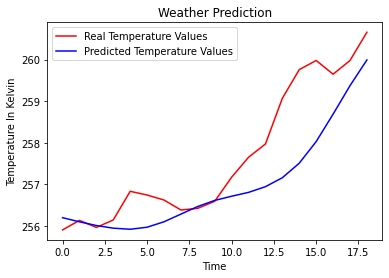

In [44]:
plt.plot(real_temperature_values, color = 'red', label = 'Real Temperature Values')
plt.plot(predicted_temperature_values, color = 'blue', label = 'Predicted Temperature Values')
plt.title('Weather Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature In Kelvin')
plt.legend()
plt.show()